## The R Base Graphics System

There are many graphics libraries available for R. They are all powerful in their own way. In this lesson - we will learn how to use R's "base graphics," the fundamental graphics system that ships included with every copy of R. After mastering base graphics, you may wish to explore other graphics systems such as `ggplot2`. 

The goal of this lesson is not to teach you how to make every type of graphic, but rather to familiarize you with the specific functions and patterns that we will use in later courses. As graphs are quite challenging to grade automatically, this lesson is ungraded - it exists to provide you with a useful reference in order to understand code that you see later. 

First, let's load the data that we'll be working with:

In [1]:
car.prices.df <- read.csv("data/car-prices.csv")
head(car.prices.df)

price.thousand.eur,top.speed.kph,color
<int>,<int>,<fct>
39,250,red
28,190,black
35,230,blue
29,160,blue
38,240,red
37,280,black


## Titles and Labels

First, let's review the earlier formatting that we learned. We can add titles and labels to our graphs by passing the `xlab`, `ylab`, and `main` arguments to `plot`:

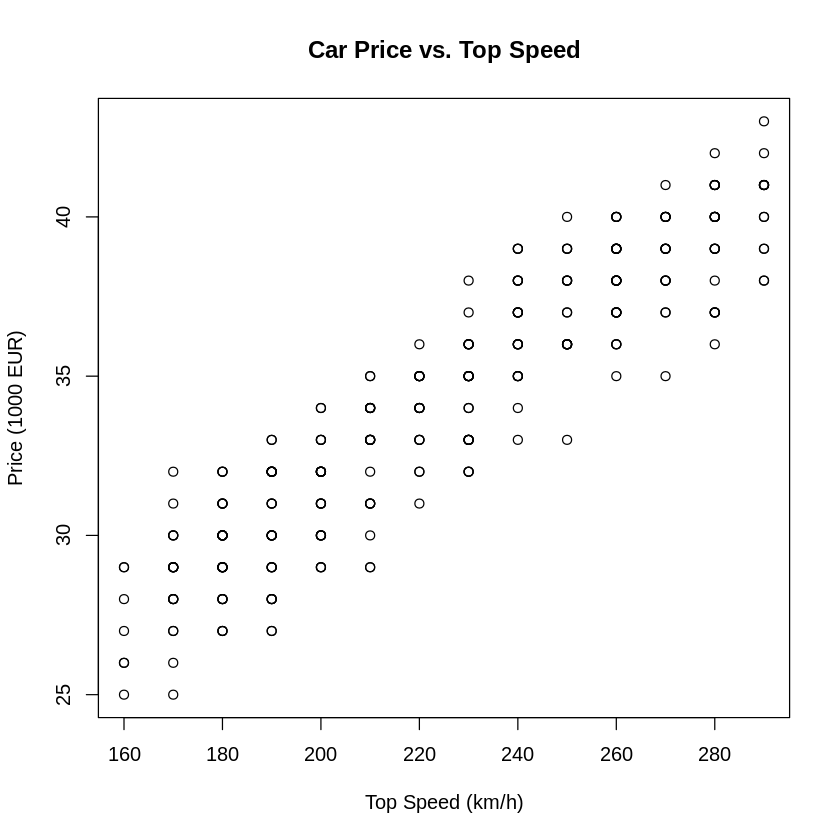

In [2]:
plot(
    car.prices.df$top.speed.kph,
    car.prices.df$price.thousand.eur,
    xlab="Top Speed (km/h)",
    ylab="Price (1000 EUR)",
    main="Car Price vs. Top Speed"
)

## Using Formulas

Typing expressions like `car.prices.df$top.speed.kph` can become very annoying and cumbersome. There is a simpler
way to tell R to plot `price.thousand.eur` (*y*-axis) vs. `top.speed.kph` (*x*-axis) - we demonstrate this below:

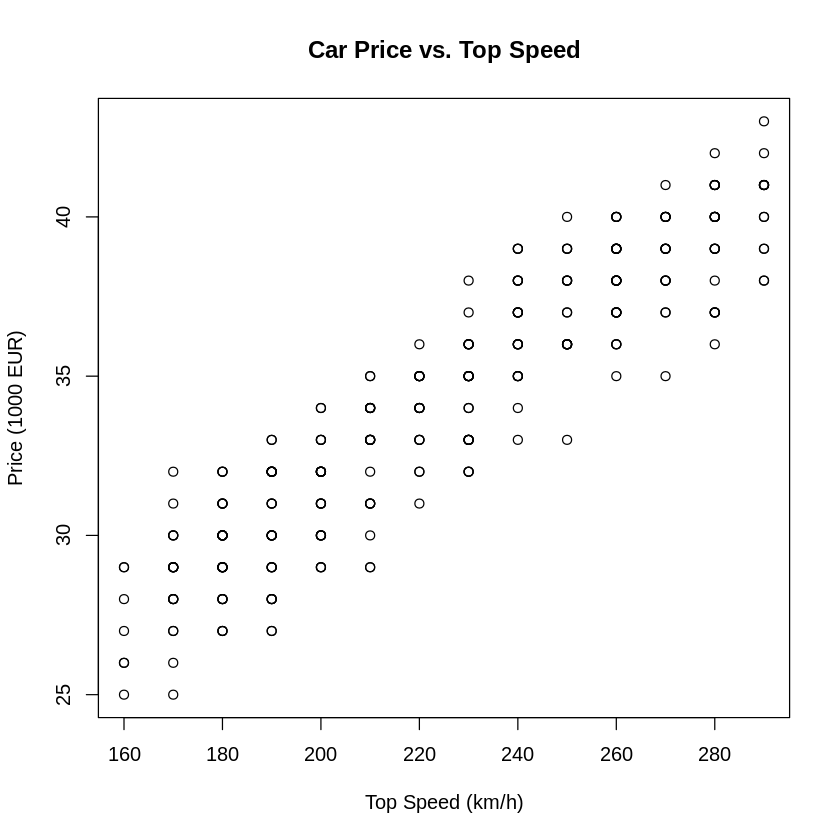

In [3]:
plot(
    price.thousand.eur ~ top.speed.kph,
    data=car.prices.df,
    xlab="Top Speed (km/h)",
    ylab="Price (1000 EUR)",
    main="Car Price vs. Top Speed"
)

The first argument in our new style of calling `plot` is called a *formula*. Representing mathematical expressions as formulas is one of the fundamental and powerful capabilities of R - we will use it extensively. Note that you can create a formula and pass it around just like any other value - the only mandatory piece is the `~`:

In [4]:
formula.in.a.variable <- left.side ~ right.side
print(formula.in.a.variable)

left.side ~ right.side


Be careful - in our original style of calling `plot` (without a formula) we passed the *x*-axis variable first. However, when using formulas, we put the *y*-axis variable first. 

## Recording Plots

In many of our later lessons we will build up our complicated graphs in stages. When doing so, it can be very useful to record plots for use later in the lesson. You will therefore often see us use `recordPlot()` as follows:

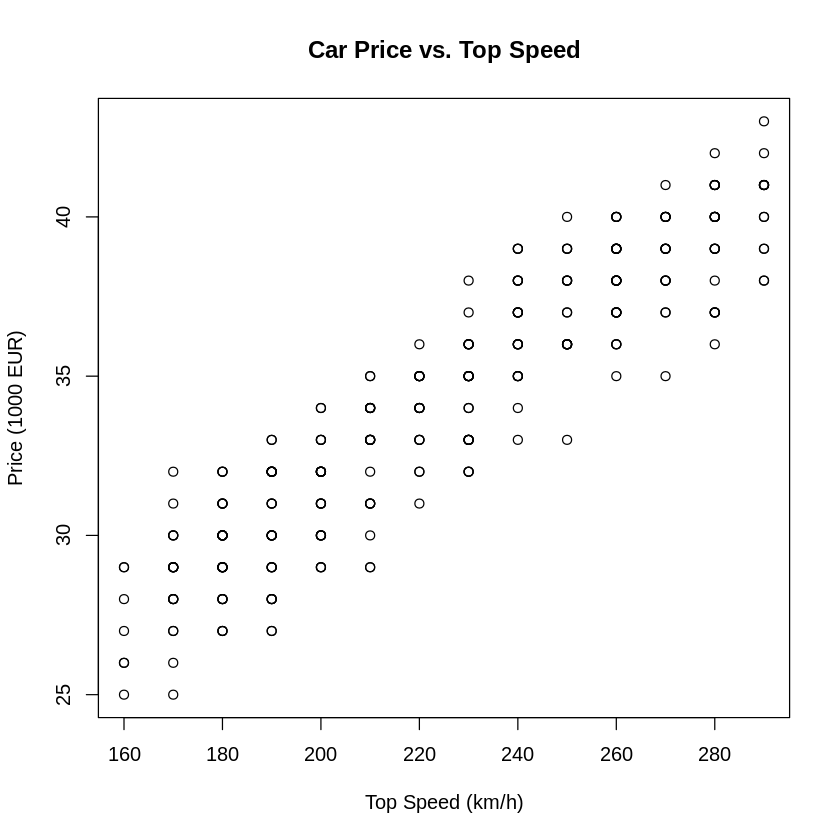

In [5]:
plot(
    price.thousand.eur ~ top.speed.kph,
    data=car.prices.df,
    xlab="Top Speed (km/h)",
    ylab="Price (1000 EUR)",
    main="Car Price vs. Top Speed"
)
p <- recordPlot()

Now, any time that we wish to redraw the plot above, all we need to do is call `replayPlot(p)`:

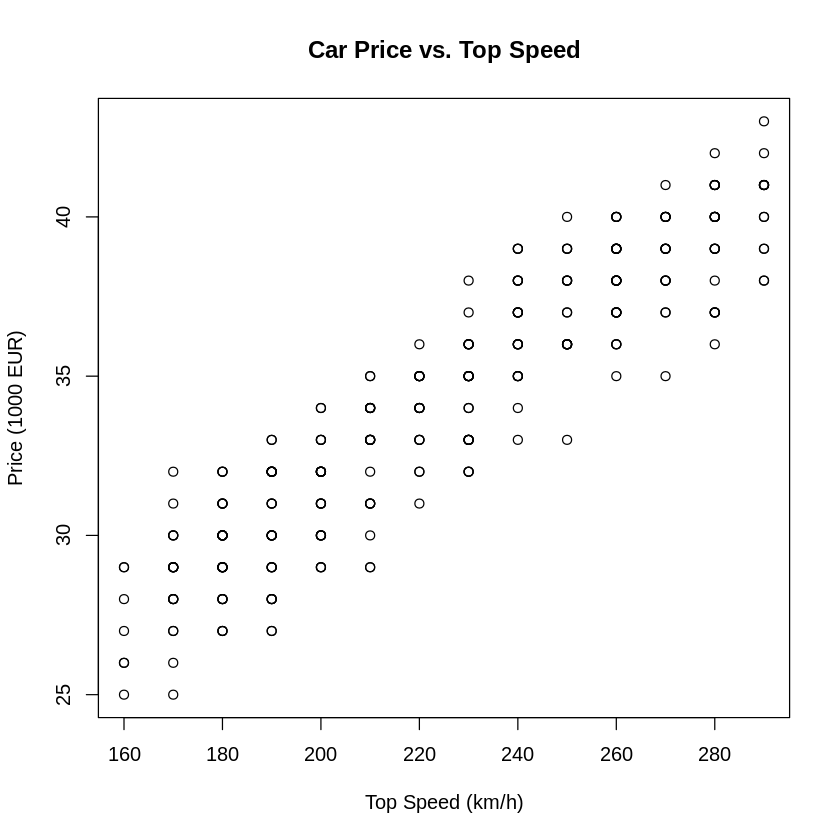

In [6]:
replayPlot(p)

## Adding/Highlighting Points

Sometimes we will wish to call attention to particular points on our scatter plot. We can do this by highlighting them using the `points` function. For example, let's find the points in our graph with the highest Top Speed values:

In [7]:
max.speed <- max(car.prices.df$top.speed.kph)
max.speed.points <- car.prices.df[car.prices.df$top.speed.kph == max.speed,]
head(max.speed.points)

,price.thousand.eur,top.speed.kph,color
,<int>,<int>,<fct>
10,39,290,black
20,40,290,blue
50,41,290,blue
76,41,290,blue
119,41,290,blue
153,42,290,blue


With the `points` function, we can highlight these points in bold and red:

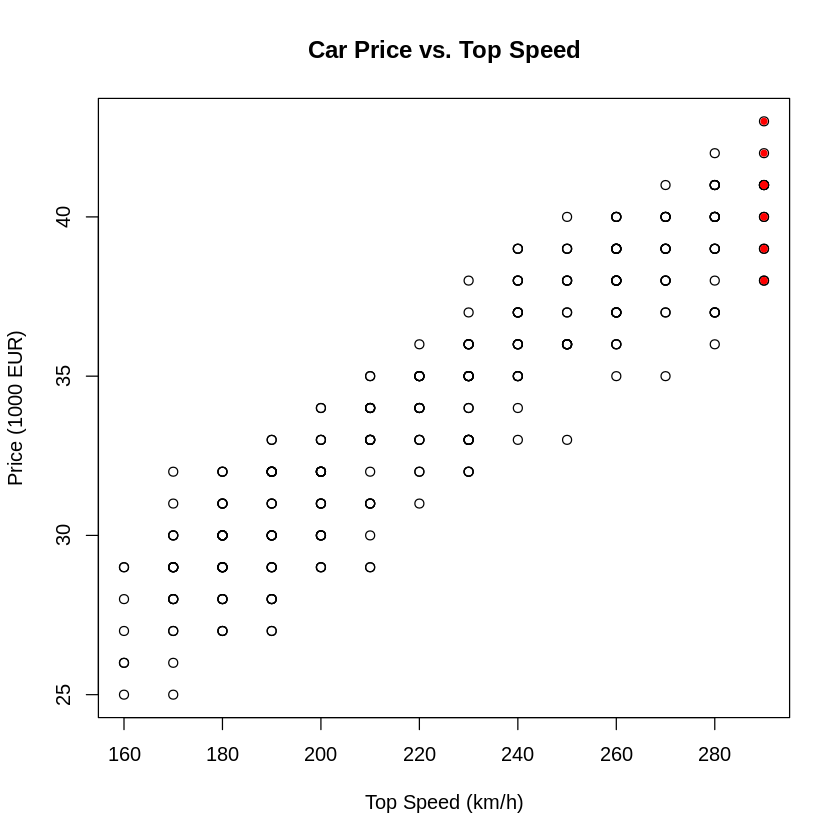

In [8]:
replayPlot(p)
points(
    price.thousand.eur ~ top.speed.kph, 
    data=max.speed.points,
    col="red",
    pch=20
)
plot.with.points <- recordPlot()

The `pch=20` argument above makes the points bold and filled in. There are many other possible `pch` values that one can use - you can read more about the various options that one can pass to the `points` function by viewing its documentation using the command below:

In [9]:
?points

## Histograms

Histograms are special graphs that show how the values of a single variable are distributed. Nearby sets of values of the chosen variable are grouped into bins, and the number of variables in each bin is plotted as a bar chart. For example, creating a histogram of `car.prices.df$top.speed.kph` shows that the top speeds of the cards in our dataset are relatively evenly distributed:

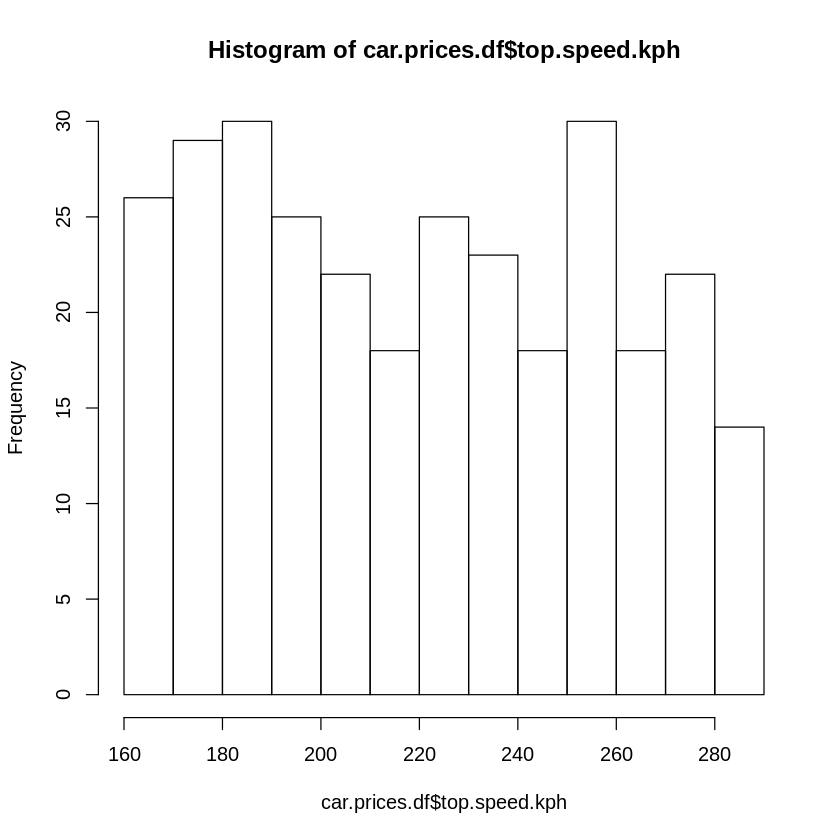

In [10]:
hist(car.prices.df$top.speed.kph)

We can relabel histograms in the same way that we can relabel scatter plots:

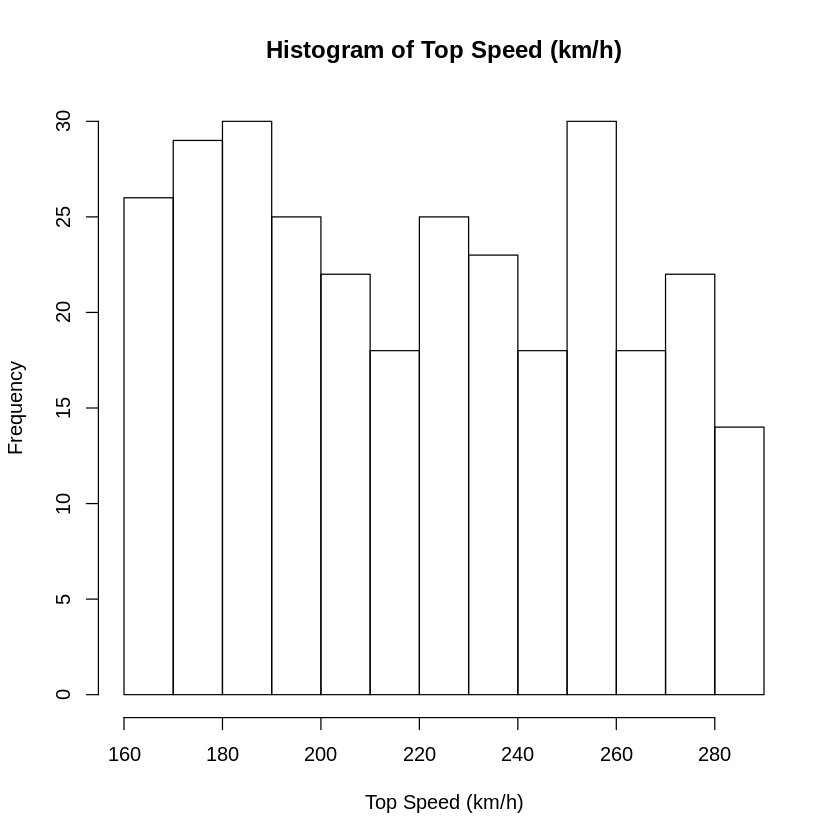

In [11]:
hist(
    car.prices.df$top.speed.kph,
    main="Histogram of Top Speed (km/h)",
    xlab="Top Speed (km/h)"
)

We will use histograms in our future lessons on regression models to explain several key points.

## Changing the Plot Size

Sometimes, the default plots that R draws in our Jupyter notebook are somewhat too large. We can view the default width and height settings using the following function:




In [12]:
options("repr.plot.width", "repr.plot.height")

$repr.plot.width
[1] 7

$repr.plot.height
[1] 7

We can make our plots smaller by calling the `options` function as follows:

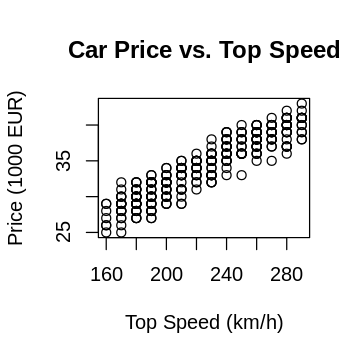

In [13]:
options(repr.plot.width=3, repr.plot.height=3)
replayPlot(p)

When we're done with this experiment, it is wise to restore the graphics to the default size:

In [14]:
options(repr.plot.width=7, repr.plot.height=7)

## Changing the Layout

We can create complex layouts involving multiple graphs simultaneously by changing R's graphics parameters using the `par` function. Before we change any parameters, the first step we must do is to save the current parameter values so that we can restore them later:

In [15]:
old.par.values <- par(no.readonly=TRUE)

Now let's experiment by changing our graphics layout to make two columns of plots, side by side:

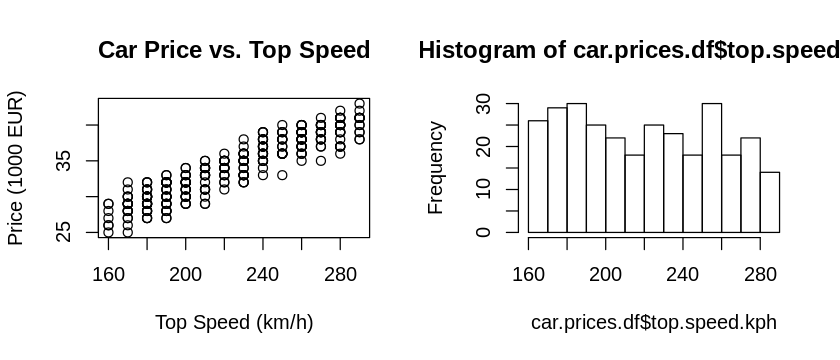

In [16]:
# make the height look nicer
options(repr.plot.height=3)
par(mfrow=c(1,2))
plot(
    price.thousand.eur ~ top.speed.kph,
    data=car.prices.df,
    xlab="Top Speed (km/h)",
    ylab="Price (1000 EUR)",
    main="Car Price vs. Top Speed"
)
hist(car.prices.df$top.speed.kph)
# restore default height
options(repr.plot.height=7)

We can see that drawing the above two graphs sequentially causes both of them to appear side-by-side. Notice that we passed the argument `mfrow=c(1,2)` - this specifies that we want our graphs arranged in one row, two columns.

Now that we are done testing `par`, we should restore our old parameter values:

In [17]:
par(old.par.values)

## Further Reading

To see extensive further use of the R base graphics capabilities, check out our Regression courses. 